In [39]:

from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(20,10)

import scipy.stats as stats
#%matplotlib inline
plt.close('all')

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 6, 8, 10, 15, 20, 25, 30, 40, 50, 60, 80, 100, 130, 160, 200, 250, 400, 600, 1000, 2000, 5000,  10000]
data = stats.bernoulli.rvs(0.3, size=n_trials[-1])
x = np.linspace(0, 1, 1000)

plt.suptitle("Bayesian updating of posterior probabilities",
#             y=1.02,
             fontsize=24)

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 4, 4, k + 1)
    plt.xlabel("$p(H)$") \
        if k in [len(n_trials) - 2] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    plt.setp(sx.get_xticklabels(), visible=True)  \
         if k in [len(n_trials) - 2] else plt.setp(sx.get_xticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y/max(y), label="%d flips\n%d heads" % (N, heads))
    plt.fill_between(x, 0, y/max(y), color="#348ABD", alpha=0.4)
    plt.vlines(0.3, 0, 1.1, color="k", linestyles="--", lw=1)

    leg = plt.legend(prop={'size':14})
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


#plt.tight_layout()

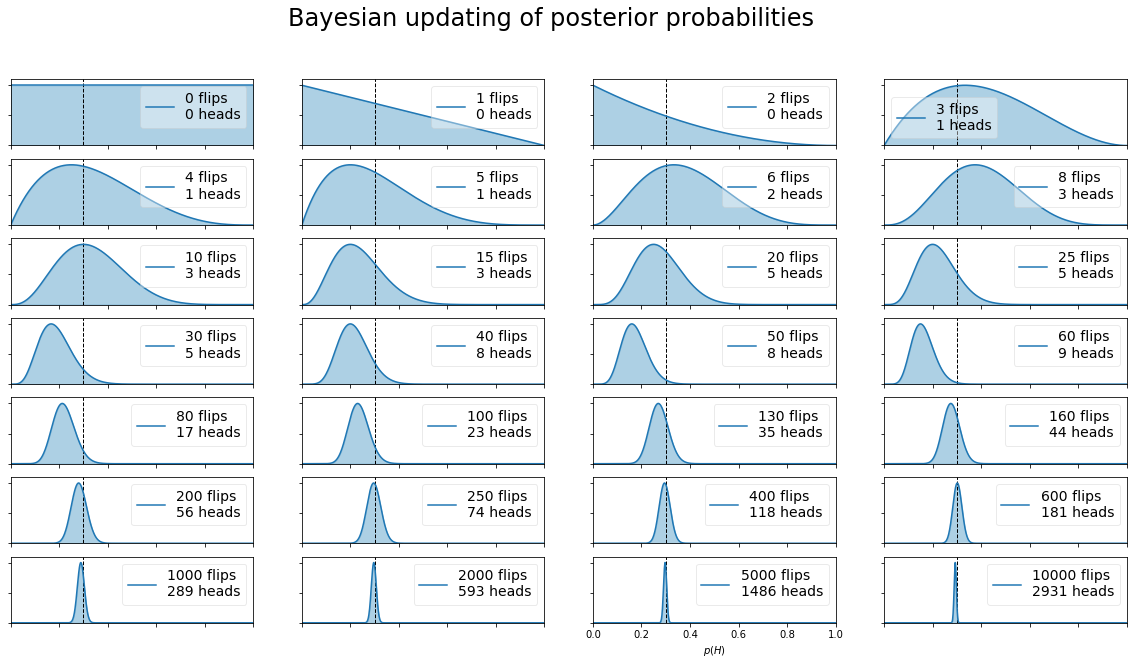

In [40]:
plt.savefig('coins.pdf',h_pad=1.0)
plt.show()


In [8]:
plt.close()